In [1]:
# Libraries and functions
import sys
sys.path.append("../functions/")
from matrices import compute_spectral_radii

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# global variables
age_groups = ['20-29', '30-39', '40-49', '50-59', '60+']                                   # list of strings with age groups 

In [2]:
# Load the dictionary containing the COMIX contact matrices Male-Male, Male-Female, Female-Male, Female-Female
with open('../data/matrices/CM_comix_bygender.json', 'r') as f:
    # Load and immediately convert lists back to numpy arrays
    CM_comix_bygender = {k: np.array(v) for k, v in json.load(f).items()}

# Load the dictionary containing the lists of COMIX contact matrices Male-Male, Male-Female, Female-Male, Female-Female obtained with bootstrap
with open('../data/matrices/CM_comix_bygender_bootstrap.json', 'r') as f:
    # Reconstruct: For every key, go through the list (v) and turn every item (m) back into an array
    CM_comix_bygender_bootstrap = {k: [np.array(m) for m in v] for k, v in json.load(f).items()}

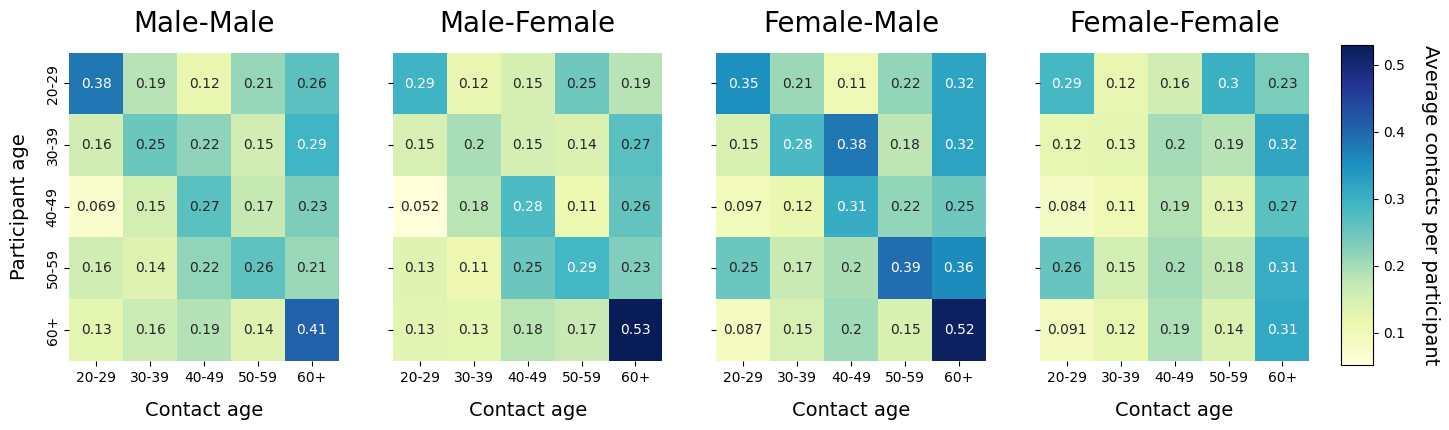

In [3]:
# --- Calculate global min/max for consistent color scaling across all plots ---
all_matrices = list(CM_comix_bygender.values())
min_value = min(m.min() for m in all_matrices)
max_value = max(m.max() for m in all_matrices)

# --- Create Plot ---
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharex=True, sharey=True)

# Iterate over axes and dictionary items simultaneously
for ax, (key, matrix) in zip(axes, CM_comix_bygender.items()):
    
    # Plot Heatmap
    sns.heatmap(matrix, annot=True, vmin=min_value, vmax=max_value, cmap="YlGnBu", cbar=False, ax=ax)
    
    # Titles and Labels
    ax.set_title(key, fontsize=20, pad=15)
    ax.set_xlabel("Contact age", fontsize=14, labelpad=12)
    
    # Set tick labels
    ax.set_xticklabels(age_groups)
    ax.set_yticklabels(age_groups)

# Add y-label only to the first plot
axes[0].set_ylabel("Participant age", fontsize=14, labelpad=12)

# --- Single Colorbar ---
# Use the last plot (axes[-1]) to anchor the colorbar reference
cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])  
cbar = plt.colorbar(axes[-1].collections[0], cax=cbar_ax)
cbar.set_label('Average contacts per participant', rotation=270, labelpad=25, fontsize=14) 

# Save figure
fig.savefig('../outputs/4Matrices_bygender_withlabels.png', dpi=300, bbox_inches='tight')
plt.show()

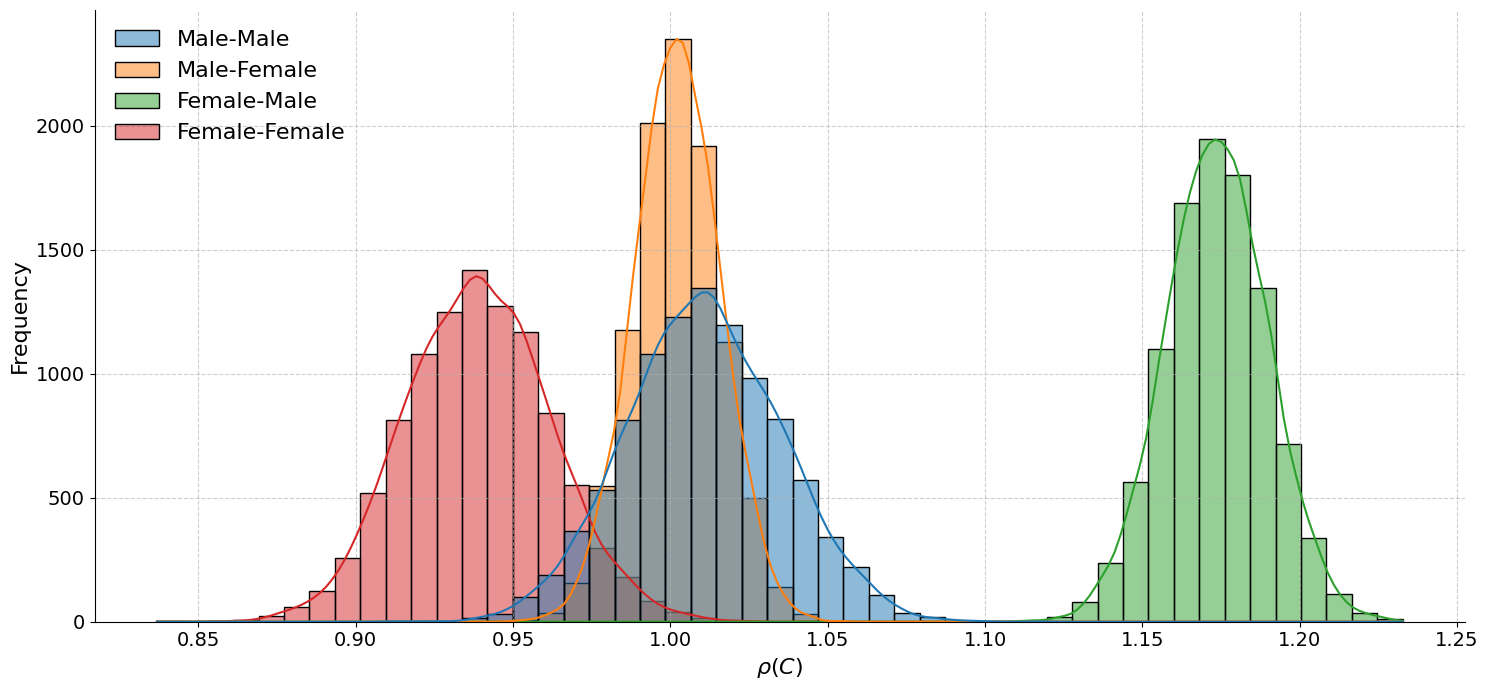

In [4]:
# Compute max eigenvalue of each matrix in each list in the dictionary 
eigen_matrices_by_gender = compute_spectral_radii(CM_comix_bygender_bootstrap)

# Reshape for plotting 
df_long = eigen_matrices_by_gender.melt(var_name='GenderPair', value_name='rho')

# --- Create Plot ---
fig, ax = plt.subplots(figsize=(15, 7))

# Plot using histograms
sns.histplot(data=df_long, x='rho', hue='GenderPair', multiple='layer', kde=True, ax=ax, legend=True)
sns.move_legend(ax, "upper left", frameon=False, title=None, fontsize=16)

# Labels
ax.set_xlabel(r'$\rho(C)$', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.tick_params(axis='both', labelsize=14)

# Styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.6)

# Save and show figure
plt.tight_layout()
fig.savefig('../outputs/Distributions_eigenvalues_bygender.png', dpi=300, bbox_inches='tight')
plt.show()